<a href="https://colab.research.google.com/github/migioz/Data-Science/blob/main/HW_Unsupervised_Clustering_Muhammad_Ilham_Gifari(fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[FILE CSV](https://drive.google.com/file/d/1nYNRUiPKr9BcH2Y4V0R6Igr3KsKsbdNA/view?usp=sharing)

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=aa743c47e94a21a659ef7bae2195f26fae6ecdd8afe8307c161be3f4bc6ae481
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Preprocessing

In [ ]:
data = pd.read_csv('Invistico_Airline.csv')
data = data.dropna()
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86008 entries, 0 to 86272
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       86008 non-null  object 
 1   Gender                             86008 non-null  object 
 2   Customer Type                      86008 non-null  object 
 3   Age                                86008 non-null  int64  
 4   Type of Travel                     86008 non-null  object 
 5   Class                              86008 non-null  object 
 6   Flight Distance                    86008 non-null  int64  
 7   Seat comfort                       86008 non-null  int64  
 8   Departure/Arrival time convenient  86008 non-null  int64  
 9   Food and drink                     86008 non-null  int64  
 10  Gate location                      86008 non-null  int64  
 11  Inflight wifi service              86008 non-null  int64  


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000,86008.000000
mean,37.302088,1927.164729,2.618408,2.989757,2.752546,2.983583,3.040764,2.996733,3.197249,3.034311,3.180169,3.204318,3.485222,3.215678,3.499384,3.077342,15.269010,15.834911
std,16.193266,910.441228,1.349760,1.580979,1.457066,1.250952,1.342570,1.353829,1.344212,1.336088,1.286805,1.319030,1.188752,1.277105,1.186034,1.333038,38.683609,39.160012
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1411.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,36.000000,1894.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,50.000000,2402.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,14.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Data Preprocessing**

In [ ]:
data_null = data.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(data))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage


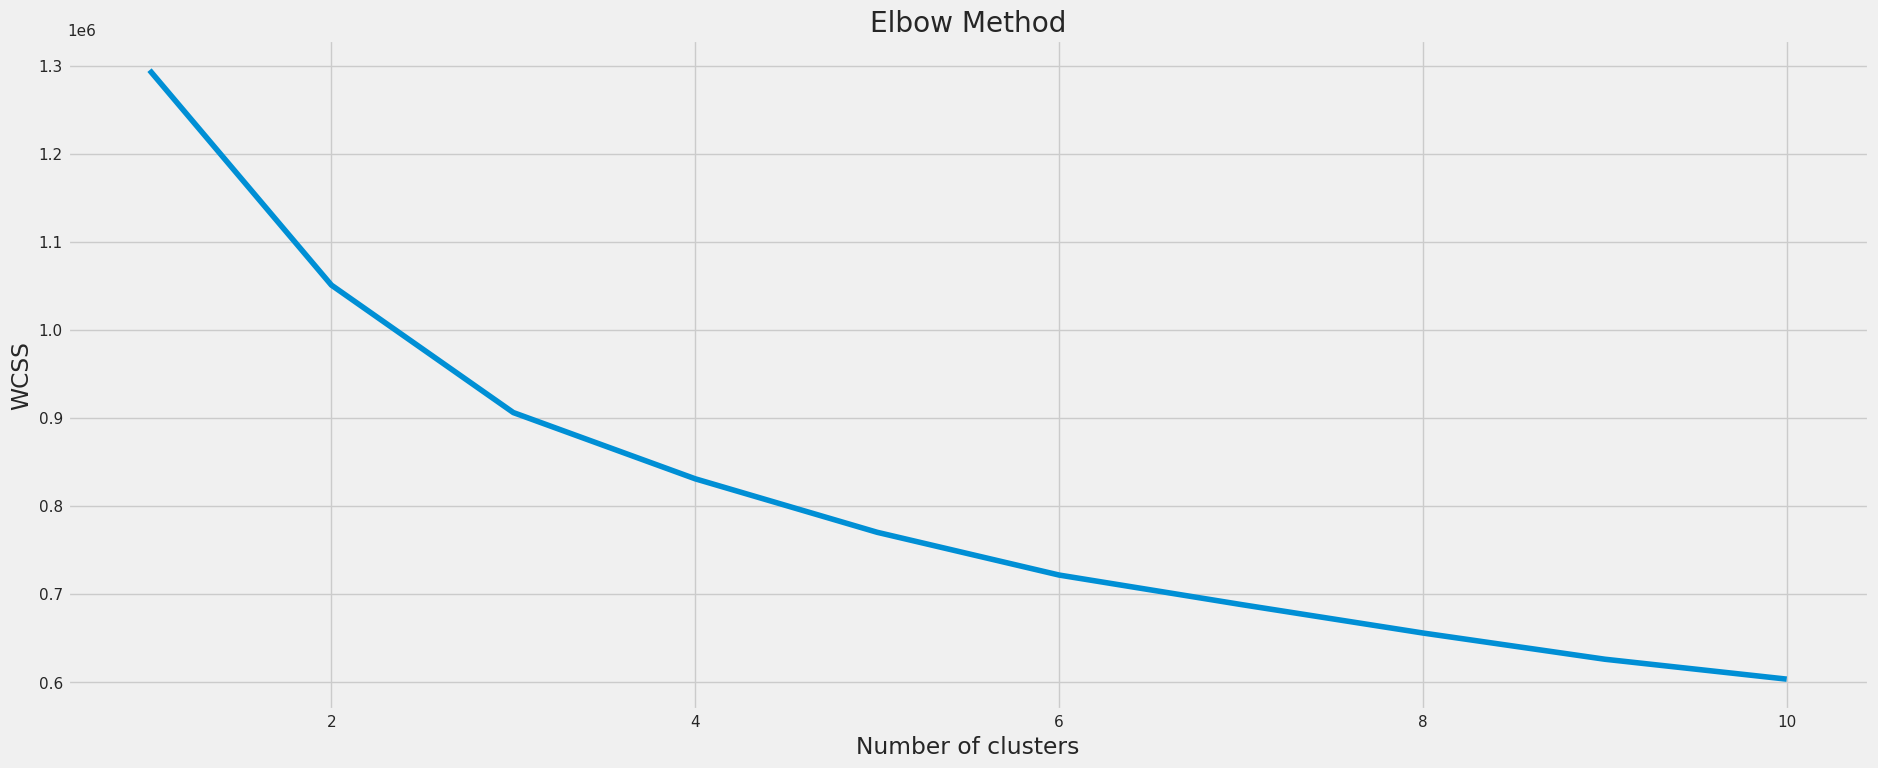

   Age   Type of Travel     Class  Flight Distance  Seat comfort  \
0   65  Personal Travel       Eco              265             0   
1   47  Personal Travel  Business             2464             0   
2   15  Personal Travel       Eco             2138             0   
3   60  Personal Travel       Eco              623             0   
4   70  Personal Travel       Eco              354             0   

   Inflight wifi service  Inflight entertainment  Online support  \
0                      2                       4               2   
1                      0                       2               2   
2                      2                       0               2   
3                      3                       4               3   
4                      4                       3               4   

   Ease of Online booking  Cleanliness  Departure Delay in Minutes  \
0                       3            3                           0   
1                       3            3    

In [ ]:
selected_features = data[['Age', 'Type of Travel', 'Class', 'Flight Distance',
                          'Seat comfort', 'Inflight wifi service', 'Inflight entertainment',
                          'Online support', 'Ease of Online booking', 'Cleanliness',
                          'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

# menangani nilai yang hilang
selected_features = selected_features.dropna()

# Normalisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features.drop(columns=['Type of Travel', 'Class']))

# menentukan jumlah cluster dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# menerapkan K-means clustering dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# menambahkan kolom label cluster ke dataset
selected_features['Cluster'] = cluster_labels

# menampilkan hasil segmentasi
print(selected_features.head())


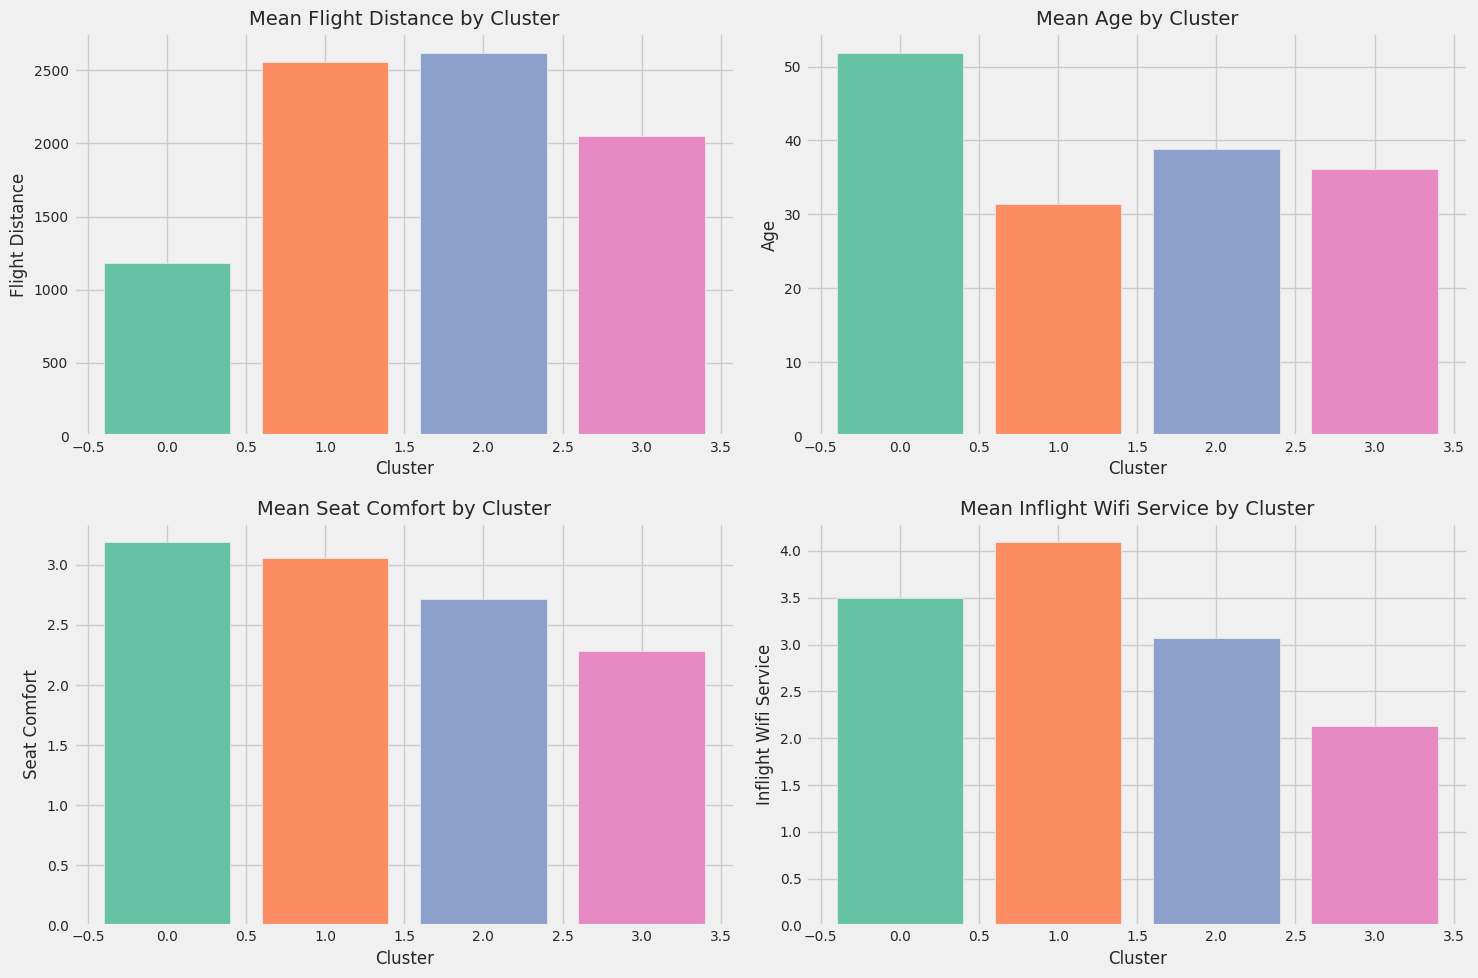

In [ ]:
import seaborn as sns

# Warna palet untuk plot
colors = sns.color_palette('Set2')

# Visualisasi hasil analisis deskriptif
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Perbandingan jarak penerbangan antar cluster
axes[0, 0].bar(cluster_analysis.index, cluster_analysis['Flight Distance'], color=colors)
axes[0, 0].set_title('Mean Flight Distance by Cluster', fontsize=14)
axes[0, 0].set_xlabel('Cluster', fontsize=12)
axes[0, 0].set_ylabel('Flight Distance', fontsize=12)
axes[0, 0].tick_params(axis='x', labelsize=10)
axes[0, 0].tick_params(axis='y', labelsize=10)

# Perbandingan usia antar cluster
axes[0, 1].bar(cluster_analysis.index, cluster_analysis['Age'], color=colors)
axes[0, 1].set_title('Mean Age by Cluster', fontsize=14)
axes[0, 1].set_xlabel('Cluster', fontsize=12)
axes[0, 1].set_ylabel('Age', fontsize=12)
axes[0, 1].tick_params(axis='x', labelsize=10)
axes[0, 1].tick_params(axis='y', labelsize=10)

# Perbandingan Seat comfort antar cluster
axes[1, 0].bar(cluster_analysis.index, cluster_analysis['Seat comfort'], color=colors)
axes[1, 0].set_title('Mean Seat Comfort by Cluster', fontsize=14)
axes[1, 0].set_xlabel('Cluster', fontsize=12)
axes[1, 0].set_ylabel('Seat Comfort', fontsize=12)
axes[1, 0].tick_params(axis='x', labelsize=10)
axes[1, 0].tick_params(axis='y', labelsize=10)

# Perbandingan Inflight wifi service antar cluster
axes[1, 1].bar(cluster_analysis.index, cluster_analysis['Inflight wifi service'], color=colors)
axes[1, 1].set_title('Mean Inflight Wifi Service by Cluster', fontsize=14)
axes[1, 1].set_xlabel('Cluster', fontsize=12)
axes[1, 1].set_ylabel('Inflight Wifi Service', fontsize=12)
axes[1, 1].tick_params(axis='x', labelsize=10)
axes[1, 1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


# *Modeling*

In [ ]:
from sklearn.preprocessing import LabelEncoder

# membuat objek LabelEncoder
label_encoder = LabelEncoder()

# melakukan encoding pada kolom 'satisfaction'
data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])

# melakukan encoding pada kolom-kolom kategorikal lainnya
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# menghitung korelasi antar fitur
print(data.corr())

# Melihat distribusi kelas pada kolom 'satisfaction'
print(data['satisfaction'].value_counts())


                                   satisfaction    Gender  Customer Type  \
satisfaction                           1.000000 -0.212236      -0.292592   
Gender                                -0.212236  1.000000      -0.030958   
Customer Type                         -0.292592 -0.030958       1.000000   
Age                                    0.117971  0.008996      -0.284172   
Type of Travel                        -0.109239  0.009503      -0.308236   
Class                                 -0.278932 -0.011574       0.042994   
Flight Distance                       -0.039224  0.120605       0.018938   
Seat comfort                           0.242384 -0.072109      -0.042845   
Departure/Arrival time convenient     -0.015507  0.052190      -0.186053   
Food and drink                         0.120677 -0.059197      -0.048725   
Gate location                         -0.012071 -0.011028      -0.000522   
Inflight wifi service                  0.227062 -0.031396      -0.073400   
Inflight ent

In [ ]:
import pandas as pd

# Memuat data
data = pd.read_csv('Invistico_Airline.csv')

# Memisahkan fitur dan target
X = data.drop(columns=['satisfaction'])  # Fitur
y = data['satisfaction']  # Target


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi nilai pada kolom 'satisfaction' menjadi numerik
data_encoded['satisfaction'] = label_encoder.fit_transform(data_encoded['satisfaction'])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# One-Hot Encoding pada fitur-fitur kategorikal
data_encoded = pd.get_dummies(data, columns=['Customer Type', 'Type of Travel', 'Class'])

# Memisahkan fitur dan target
X = data_encoded.drop(columns=['satisfaction'])
y = data_encoded['satisfaction']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan SimpleImputer untuk mengisi nilai yang hilang dengan median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Melatih model Regresi Logistik
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)
print("\nMatriks Konfusi:\n", conf_matrix)

Akurasi: 0.8253387742531567

Laporan Klasifikasi:
               precision    recall  f1-score   support

dissatisfied       0.81      0.80      0.80     11675
   satisfied       0.84      0.84      0.84     14301

    accuracy                           0.83     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.83      0.83      0.83     25976


Matriks Konfusi:
 [[ 9358  2317]
 [ 2220 12081]]


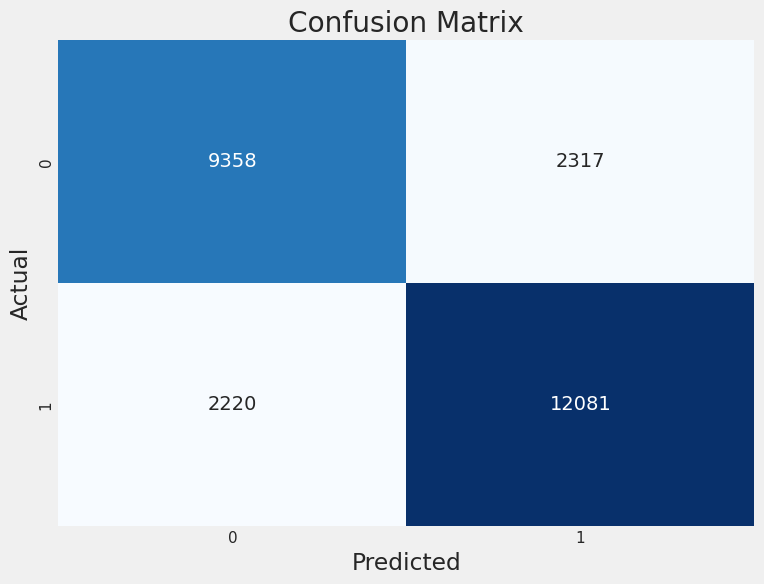

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung matriks konfusi
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


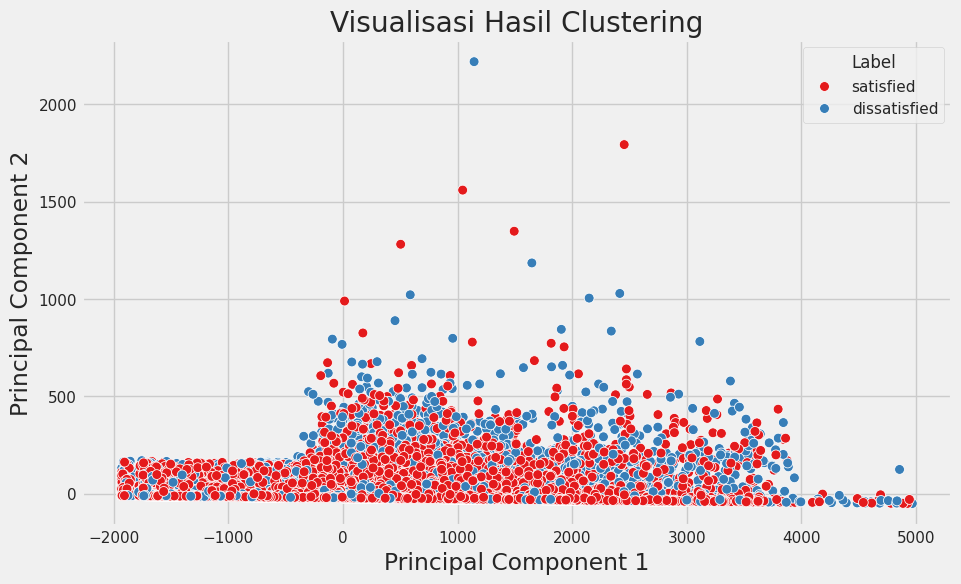

In [ ]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Membuat DataFrame dari data hasil PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Label'] = y_train

# Memplot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Label', palette='Set1', s=50)
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.show()

# INSIGHT

Tujuan dari homework ini adalah untuk melakukan analisis data yang mendalam dan memahami pola-pola yang terkandung di dalamnya. Dengan melakukan analisis ini, kita dapat mencapai beberapa tujuan, antara lain:

1. **Memahami Pelanggan**: Analisis data membantu kita memahami preferensi, perilaku, dan kebutuhan pelanggan. Dengan pemahaman ini, perusahaan dapat menyusun strategi pemasaran yang lebih efektif dan menyediakan layanan yang lebih sesuai dengan kebutuhan pelanggan.

2. **Meningkatkan Kepuasan Pelanggan**: Dengan mengidentifikasi faktor-faktor yang memengaruhi kepuasan pelanggan, perusahaan dapat mengambil langkah-langkah untuk meningkatkan pengalaman pelanggan. Hal ini dapat meliputi peningkatan kualitas layanan, penyesuaian produk, atau perbaikan proses layanan.

3. **Mengoptimalkan Operasional**: Analisis data juga membantu dalam mengoptimalkan proses operasional perusahaan. Dengan memahami pola-pola dalam data operasional, perusahaan dapat meningkatkan efisiensi, mengurangi biaya, dan mengidentifikasi area-area yang perlu ditingkatkan.

4. **Meningkatkan Keputusan Bisnis**: Data yang dianalisis dengan baik memberikan wawasan yang berharga untuk pengambilan keputusan bisnis yang lebih baik. Ini membantu manajemen dalam membuat keputusan yang lebih tepat dan berdasarkan bukti, daripada hanya bersandar pada intuisi.

5. **Inovasi Produk dan Layanan**: Analisis data dapat mengungkapkan peluang-peluang baru untuk inovasi produk dan layanan. Dengan memahami kebutuhan pelanggan dan tren pasar, perusahaan dapat mengembangkan produk dan layanan yang lebih inovatif dan relevan.

**Klaster 1 (dissatisfied):**
*   Precision: 0.81
*   Recall: 0.80
*   F1-score: 0.80
*   Support: 11675

**Karakteristik:** Lebih cenderung menuju ke "dissatisfied".
Memiliki jumlah support yang cukup signifikan.
Precision, recall, dan F1-score memiliki nilai yang cukup seimbang.

**Insight:** Pelanggan dalam klaster ini cenderung memiliki pengalaman yang kurang memuaskan.
Kemungkinan besar mereka mengalami masalah atau ketidakpuasan tertentu dalam layanan yang mereka terima.
Strategi untuk meningkatkan kepuasan pelanggan dalam klaster ini dapat berfokus pada memahami masalah yang mereka hadapi dan menyediakan solusi yang sesuai.

**Klaster 2 (satisfied):**
*   Precision: 0.84
*   Recall: 0.84
*   F1-score: 0.84
*   Support: 14301

**Karakteristik:** Lebih cenderung menuju ke "satisfied".
Memiliki jumlah support yang cukup tinggi.
Precision, recall, dan F1-score memiliki nilai yang cukup seimbang.

**Insight:** Pelanggan dalam klaster ini cenderung memiliki pengalaman yang memuaskan.
Layanan yang mereka terima mungkin telah memenuhi atau melebihi harapan mereka.
Strategi untuk mempertahankan kepuasan pelanggan dalam klaster ini dapat berfokus pada mempertahankan kualitas layanan yang baik dan memberikan nilai tambah yang konsisten.